# EDA 4 - Quantitative Bivariate Analysis

In EDA 3 we did a bivairate analysis that compared a categorical variable and a quantitative variable. Now we are going to compare two quantitative variables. 

We're going to use some rental data from the Texas area. Let's do our set up and some quick analysis before we **get to work!**

In [1]:
import pandas as pd

rentals = pd.read_csv('texas_housing.csv')
rentals.head()

,price,type,square_feet,beds,baths,latitude,longitude
0,615,apartment,364,0,1.0,35.1653,-101.8840
1,1346,apartment,816,1,1.0,32.9865,-96.6860
2,900,apartment,500,1,1.0,30.2355,-97.7292
3,650,apartment,700,1,1.0,26.1923,-98.2657
4,1330,apartment,1040,2,2.0,30.6380,-96.2940


We have 7 variables

- **price**: This is a numerical variable. Generally speaking, we consider price a *continuous* quantitative variable, because it is usually captured with the decimal values (cents). Here we see whole dollar values which makes it appear like a *discrete* value. For the sake of accuracy and continuity, we're going to treat it as a *continuous* variable. ```Remember... continuous is something we measure, discrete is something we count```
- **type**: We know this is categorical. If there are only two values it is *binary*, if there are more its *nominal*. Generally speaking type variables are labels that provide information about the **observation**. An observation (scientifically speaking) is synonymous w/ row or record. It is common to use type as a means of mixed bivariate analysis, where we compare other variables against each type value.
- **square_feet**: This is a quantitative variable. The column name itself is a unit of measurement, so this is a slam dunk. This is *continuous*. It is worth noting that even though we have a variable that is generally considered continuous, that doesn't mean it was named correctly or that it was captured correctly. Maybe square feet refers to the number of Minecraft characters with actual square feet. That would be *discrete*. If it was entered manually, the inches or fractions of inches might not have been captured, making the actual data more representative of a *discrete* variable.
- **beds, baths**: These are both *discrete* quantitative values. We count bedrooms and bathrooms. Bathrooms are annoying. See rant below.  
- **latitude, longitude**: these are *continuous* variables. They are values we measure.

---
**Bathroom Rant:**
A half bath is a facade of continuity as a variable. If we want to nitpick this, it is a compound variable because the nature of a half bath communicates a type of bathroom or the "features" of the bathroom. We don't actually cut a bathroom in half. I'm going on this rant for two reasons: 1. I feel like it. 2. because being this pedantic about data analysis is important sometimes. 

What is the difference between a half and full bath? It comes down to the fixtures. Half the bathrooms have a toilet and a sink. If you are particularly observant, you might notice that these are usually located near the main or common living areas of a home. This is convenient for the more common uses of a bathroom during the day and for guests. A full bathroom includes a bathtub, shower, combo of the two or one of each. 

Put yourself in the position of a renter. How might these differences impact you? 

How would a single consultant who travels a lot view it? How would a family of 4 who love to entertain view it? 

---

At any rate, let's take a closer look (at our data, not the bathrooms)!

In [2]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4981 non-null   int64  
 1   type         4981 non-null   object 
 2   square_feet  4981 non-null   int64  
 3   beds         4981 non-null   int64  
 4   baths        4981 non-null   float64
 5   latitude     4936 non-null   float64
 6   longitude    4936 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 272.5+ KB


---

You might notice that ```info()``` gives us the shape of the dataframe. We have 7 columns and a total of 4981 entires. 

The datatypes are ok. 
- Price and square feet as an int64 are fine. I'd prefer a float because the value is *continuous*, but if we don't have the fractional components of the value, there's no need to waste the storage. For the sake of accuracy we are going to change them. 
- Type is actually a string, but pandas encodes this as an object. we can recategorize this as a string. We'll look at this shortly
- beds as an int are perfect.
- baths as a float are annoying, but accurate due to the reasons I ranted about above.
- lat and long are accurate as floats.

Let's make our adjustments. 

In [3]:
# we're going to start by fixing price and square_feet
rentals.price = rentals.price.astype('float64')
rentals.square_feet = rentals.square_feet.astype('float64')
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4981 non-null   float64
 1   type         4981 non-null   object 
 2   square_feet  4981 non-null   float64
 3   beds         4981 non-null   int64  
 4   baths        4981 non-null   float64
 5   latitude     4936 non-null   float64
 6   longitude    4936 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 272.5+ KB


Ok, we've taken care of our *continuous* variables...

Now for the string. I didn't make a big deal about this in previous lessons but as I'm moving along, I'm trying to introduce new nuances piece by piece. 

#### What is the difference between 'string' and 'object' in pandas? 

String was specifically created and optimized for text data. This means that it supports operations that were designed for text (i.e. string manipulation like ```lower()``` or ```upper()```). It's also more memory efficient than an Object data type when storing text data. 

Object is a generic type. It can contain **any Python object**. As with most things, generalism tends to increase scope and reduce the ability to optimize for any one thing. This means that object is often less efficient at storing a given type of data than a dataytpe that was designed specifically for that type of data. 


#### When do I use String? 

There are two primary reasons. 
1. Performance. If you are dealing with a large amount of text data, this data type will be more performant.
2. String manipulation. If the text data is ambiguous, consistently unclean (manual entry?) or has other needs that require you to wrangle around with it, this is a great reason.

#### When can't I use it? 

1. compatibility. Unfortunately, older codebases, third party libs, or other languages might not recognize the string data type.
2. **compatibility**. I'm emphasizing this, because many folks embarking on greenfield projects ignore third party libaries or polyglot environments, and then find themselves in troubling circumstances.
3. Mixed data. If there are going to values in the dataset that aren't text data, you have to use an object. This is important to consider. Sometimes you can convert values to a string, and this can often be automated. This isn't always a good idea. If only 10% of the data is text-based, then we are optimizing all of the data towards a type that is only 1/10th of the actual data. It's a good bet that we the other 9/10s might not be well-suited for those optimizations.

With all that said.. let's investigate the variable. 

In [4]:
# first, what are the values we've got? 
rentals.type.unique()

array(['apartment', 'house', 'duplex', 'townhouse', 'flat', 'condo',
       'manufactured', 'loft', 'cottage/cabin', 'in-law'], dtype=object)

---
Ok, we've got 10 different types which helps us identify this as a *nominal* variable. All of the data is text based, and we know that this exercise is unlikely to leave this Jupyter notebook. 

We could say that changing the datatype is overkill based on that last sentence, but we're going to do it anyway as a means of practice. 

In [5]:
rentals.type = rentals.type.astype('string')
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4981 non-null   float64
 1   type         4981 non-null   string 
 2   square_feet  4981 non-null   float64
 3   beds         4981 non-null   int64  
 4   baths        4981 non-null   float64
 5   latitude     4936 non-null   float64
 6   longitude    4936 non-null   float64
dtypes: float64(5), int64(1), string(1)
memory usage: 272.5 KB


---

Let's take a quick look at the summaries of the data to see what the quality of the variables look like

In [6]:
rentals.describe(include='all')

,price,type,square_feet,beds,baths,latitude,longitude
count,4981.000000,4981,4981.000000,4981.000000,4981.000000,4936.000000,4936.000000
unique,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,apartment,NaN,NaN,NaN,NaN,NaN
freq,NaN,4396,NaN,NaN,NaN,NaN,NaN
mean,993.983337,NaN,891.022285,1.720137,1.453423,31.044918,-98.397013
std,387.906707,NaN,332.669473,0.851159,0.583611,2.075259,2.775968
min,1.000000,NaN,1.000000,0.000000,0.000000,25.899800,-106.598000
25%,730.000000,NaN,680.000000,1.000000,1.000000,29.800300,-99.499400
50%,905.000000,NaN,844.000000,2.000000,1.000000,30.651000,-97.795600
75%,1149.000000,NaN,1041.000000,2.000000,2.000000,32.419000,-96.730825


---

So, let's take a long hard look at this. (Sorry, we haven't gone this deep before). 

First I'm going to go through the summaries that are provided. 
- **count**: This is the number of observations (records, rows, whatever).
- **unique**: This is only relevant for *categorical* variables. It tells you the number of unique variables. You can use this to identify *binary* variables.
- **top**: this is the most frequently occurring value for a *categorical* variable.
- **freq**: this is the actual frequency of the value idenfitied in **top**.
- **mean, min and max**: we know what these *mean* (haha) by now!
- **25,50,75**: These are the *median* and the boundaries of the *IQR*. We know what these mean too!
- **std**: Standard Deviation. This is going to become more interesting in coming lessons, because standard deviations are used in evaluating spread. 

Some observations from the summaries: 
- we have 4981 observations, but 4936 for **latitude/longitude**, which appears to be missing 45 observations?. We'll dig into this.
- we'll use ```value_counts()``` to validate the **top/freq**
- **mean,median,25,75** and **std** are all fairly difficult to evaluate from ```describe()``` unless you have intimate domain knowledge. We usually need some form of visualization to take a look at the trends and shape of the data in addition to some understanding of the meaning of that data in order to perform any analysis of these values.
- **min** and **max** are more useful from this view because they represent the absolute top and bottom of the ranges of values. This is where mistakes, inaccuracies and outliers tend to live. Unless you've committed the map of the planet to memory, it's unlikely you'll be able to pick out long/lat by the naked eye. We can probably look it up, but most of the values appear continuous, so I doubt that there are any errors there. Looking across the variables for **max** most of the values appear fairly reasonable. **min** however shows a few areas that are worrisome. A $1 apartment, 1 square foot and 0 beds/0 bath are either a mistake or a smartass trying to rent out a shoebox. 

In [7]:
# let's look at latitude and longitude
rentals.isnull().sum()

price           0
type            0
square_feet     0
beds            0
baths           0
latitude       45
longitude      45
dtype: int64

In [8]:
# found some! Let's take a closer look at these values
rentals[rentals.isnull().any(axis=1)]

,price,type,square_feet,beds,baths,latitude,longitude
117,2355.0,apartment,1628.0,3,2.5,NaN,NaN
414,689.0,apartment,950.0,2,2.0,NaN,NaN
434,2205.0,apartment,816.0,1,1.0,NaN,NaN
504,1499.0,apartment,1202.0,3,2.0,NaN,NaN
555,1159.0,apartment,784.0,1,1.0,NaN,NaN
579,1230.0,apartment,1221.0,3,2.0,NaN,NaN
682,1455.0,apartment,1225.0,2,2.0,NaN,NaN
720,1262.0,apartment,764.0,1,1.0,NaN,NaN
930,1100.0,apartment,670.0,1,1.0,NaN,NaN
972,999.0,apartment,705.0,1,1.0,NaN,NaN


---
Okay, we've found the null values and examined them across each observation. There doesn't appear to be any rhyme or reason. The values might have just been left out. 

```A possible reason for missing long/lat values on locations is new construction or new street location. Many APIs for companies like Zillow or Redfin pull this information based on GIS. Some new locations haven't been registered, so it's a possible reason for the missing value.```

Let's go ahead and validate the top/freq

In [9]:
rentals.type.value_counts()

type
apartment        4396
house             296
manufactured       86
townhouse          80
condo              54
duplex             44
loft               12
flat                9
cottage/cabin       3
in-law              1
Name: count, dtype: Int64

---
Awesome. This checks out. 

### Scatter Plots: Viewing Numbers Against Numbers

Scatter plots are a great way to find a linear relationship between two quantitative variables across multiple observations. 

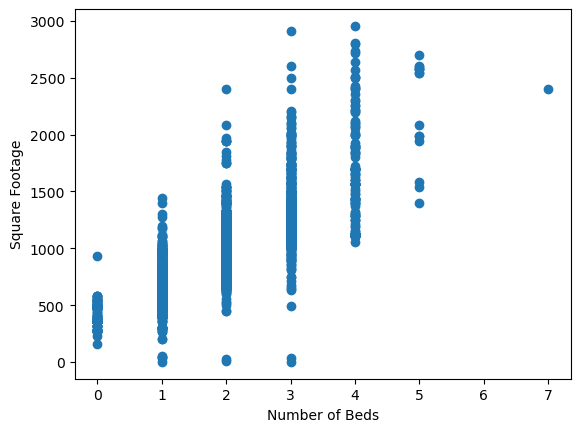

In [10]:
# We need to import our handy lib to do the vis work.
import matplotlib.pyplot as plt

plt.xlabel('Number of Beds') 
plt.ylabel('Square Footage')
plt.scatter(x=rentals.beds, y=rentals.square_feet)
plt.show()
plt.close()

You'll notice that we have what looks periodic, because the plot isn't continuous. This is because the number of beds is a discrete variable. This is a normal phenomenon when working with discrete variables. 

The advantage of discrete variables is that it makes relationships between each discrete variable very clear. 


**Observations:**
- We can see several observations of unreasonably low square footage and 0 beds. 
- Generally, we see that an increase in square footage shows an increase in the number of bedrooms. This makes sense, because bedrooms take up space, so more bedrooms would (reasonably) increase the square_footage of a rental.
- The 7 bedrooms looks like an outlier based on its separation from the rest of the data.
- The 5 bedrooms is fairy interesting, because it's clumped around a few square footage values. This could be due to the lack of samples related to the details of the offerings (i.e. a particular apartment complex layout that offers these features,etc.)

#### Why do we use scatter plots? 

I told you already! We use it to try to define and identify relationships and associations between 2 quantitative variables. Our eyes are powerful machines for analysis; however, our brains can easily make mistakes perceiving this information and we are prone to picking out patterns that aren't actually there. This means we need some other tools to validate our findings. Math tends to help out...

### Covariance

This is summary statistics that describes the *strength* of a linear relationship between observations across multiple variables. 

- **positive** covariance is a linear relationship that draws from the bottom left to the top right of a scatter plot. This shows a relationship between larger values of one variable and larger values of another. A good example, might be height and pants size.
- **negative** covariance is a linear relationship that draws from the top left to the bottom right. This shows a relationship between larger values of one value and smaller values of the other. This is also known as an *inverse proportional* relationship. A good example might be as external temperature goes down, heating costs go up.
- **zero** covariance is when a scatter plot looks...scattered. There is no discernable linear relationship



![Covariance Figure](./covariance_fig1.svg)

*Figure 1: Demonstrates Scatter Plot and Covariance*

What a covariance matrix looks like for two (or more) variables. 

| | variable 1 | variable 2 | 
|-|-|-|
| variable 1 | variance (variable 1) | covariance | 
| variable 2 | covariance | variance (variable 2) |

Let's explain these values to understand how the matrix is calculated. 

**variance**
For a population, we divide the sum of *squared deviations* by the number of data points
For a sample, we divide by n - 1 (This is called **Bessel's correction**.) I'm going to hand wave over the theory right now, but generally speaking we rarely have access to an entire population, so we more often than not will be using this calculation. 

**TBD add the math equations??**


Let's assume we have a data set of ```[1,2,3,4,5]``` for variable 1 and ```[2,4,6,8,10]``` for variable2. 

1. We have to calculate the mean

variable 1: (1 + 2 + 3 + 4 + 5) / 5 = 15 / 5 = **3**

variable 2: (2 + 4 + 6 + 8 + 10) / 5 = 30/5 = **6**

2. We calculate the *deviation* of each mean, which is subtracting the mean from each data point.

variable 1
- 1 - 3 = **-2**
- 2 - 3 = **-1**
- 3 - 3 = **0**
- 4 - 3 = **1**
- 5 - 3 = **2**

variable 2
- 2 - 6 = **-4**
- 4 - 6 = **-2**
- 6 - 6 = **0**
- 8 - 6 = **2**
- 10 - 6 = **4**

3.  Now we square each deviation *note: this is one method for ensuring that negative/positive values don't cancel each other out. However, one of the limitations of using squared values is that the results are no longer related to the context of the data point, i.e. they are hard to interpret. This is one of the reasons that the **mean absolute deviation** uses the absolute value*

variable 1 = ```[4, 1, 0, 1, 4]```
variable 2 = ```[16, 4, 0, 4, 16]```

*When you compare this to the initial data points and even the deviations alone, you can see the skew that is beginning to happen*

4.  Add up the squared deviations. (This is the part that led to step 3. Summing positive and negative values after calculating deviations often leads to canceling out values in normal distributions.)

variable 1: **10**
variable 2: **40**

5.  Let's do the final calculation.

If this were the entire population: 
- variable 1: 10 / 5 = **2**
- variable 2: 40 / 5 = **8**

If this were a sample, we use Bessel's correction:
- variable 1: 10 / (5 - 1) = **2.5**
- variable 2: 40 / (5 - 1) = **10**

**covariance**
This is the calculation we are looking for. It involves measuring the degree to which two variables change together. 

1. We need to calculate the mean (we did that already)

variable 1: **3**

variable 2: **6**

2. We calculate the *deviations* from the mean. (we did that too!)

variable 1: ```[-2, -1, 0, 1, 2]```
variable 2: ```[-4, -2, 0, 2, 4]```

3. Now we multiply the associated deviations from variable 1 against variable 2.

co-products: 
- -2 * -4 = **8**
- -1 * -2 = **2**
- 0 * 0 = **0**
- 1 * 2 = **2**
- 2 * 4 = **8**

4. Calculate the sum of those values

8 + 2 + 0 + 2 + 8 = **20**

5. The final calculation is the same for covariance as it is for variance. We divide by *n* for whole populations or **Bessel's correction** *(n-1)* for samples.

for a population: 20 / 5 = **4**
for a sample 20 / (5 - 1) = **5**

---

This is a lot of math, but python does this work for us. We're going to calculate the variance of each variable,then we're going to calculate the covariance to validate the variance calculations as well as obtain the variance. (Use the table provided above to decypher the matrix output of ```cov()```)

In [14]:
# First let's show bedrooms
rentals.beds

0       0
1       1
2       1
3       1
4       2
       ..
4976    2
4977    1
4978    1
4979    1
4980    2
Name: beds, Length: 4981, dtype: int64

In [15]:
# Now let's calculate the mean for beds and use that mean to calculate the deviations. 
beds_mean = rentals.beds.mean() # Rawr
beds_deviations = rentals.beds - beds_mean

print(f'Mean - Bedrooms: {beds_mean}')
print(f'Deviations - Bedrooms: ')
beds_deviations

Mean - Bedrooms: 1.7201365187713311
Deviations - Bedrooms: 


0      -1.720137
1      -0.720137
2      -0.720137
3      -0.720137
4       0.279863
          ...   
4976    0.279863
4977   -0.720137
4978   -0.720137
4979   -0.720137
4980    0.279863
Name: beds, Length: 4981, dtype: float64

In [20]:
# Quick inspection checks out looks good.. let's keep going. 

# Now we need to calculate the squared deviations before we sum them. 
beds_squared_deviations = beds_deviations.apply(lambda x: x * x)
beds_squared_deviations

0       2.958870
1       0.518597
2       0.518597
3       0.518597
4       0.078324
          ...   
4976    0.078324
4977    0.518597
4978    0.518597
4979    0.518597
4980    0.078324
Name: beds, Length: 4981, dtype: float64

In [21]:
# Another quick inspection looks good... let's keep going

# calculate the sum of the squared deviations. 
sum_beds_squared_deviations = beds_squared_deviations.sum()
sum_beds_squared_deviations

3607.8703071672358

In [23]:
# let's bring it home. We're going to calculate it for a sample or population and print both
n = len(rentals.beds)
print(f'Variance of Bedrooms (Population): {sum_beds_squared_deviations / n}')
print(f'Variance of Bedrooms (Sample)    : {sum_beds_squared_deviations / (n - 1)}')

Variance of Bedrooms (Population): 0.7243265021415852
Variance of Bedrooms (Sample)    : 0.7244719492303686


In [24]:
# let's check our work. 
rentals.beds.var()

0.7244719492303704

---
We've learned a few things
1. the ```var()``` method assumes you are using a sample, not the full population. For many statistics this is a good assumption.
2. there is a ```var()``` method that makes this so so so much easier.
3. I like to tell you about those things after making you do the hard part.
4. The manual calculation is different than the direct calculation. This is due to some rounding, truncating and general screwyness w/ math in python (and any programming language). The rule of thumb is trust the direct method... ```var()```

In [33]:
# We're going to repeat the steps for square footage, but I will do it all in a single notebook cell. 
sqft_mean = rentals.square_feet.mean() # Rawr! mean square feet.
sqft_deviations = rentals.square_feet - sqft_mean
sqft_squared_deviations = sqft_deviations.apply(lambda x: x * x)
sum_sqft_squared_deviations = sqft_squared_deviations.sum()
n = len(rentals.square_feet)
population_variance = sum_sqft_squared_deviations / n
sample_variance = sum_sqft_squared_deviations / (n - 1)

print(f'Square Feet Values: ')
print(rentals.square_feet)
print()
print(f'Mean Square Footage: {sqft_mean}')
print()
print(f'Square Feet Deviations: ')
print(sqft_deviations)
print()
print(f'Square Feet Squared Deviations: ')
print(sqft_squared_deviations)
print()
print(f'Sum of Squared Deviations: {sum_sqft_squared_deviations}')
print(f'Square Footage Variance (Population): {population_variance}')
print(f'Square Footage Variance (Sample)    : {sample_variance}')
# Go through the output and check to make sure everything makes sense to you.

Square Feet Values: 
0        364.0
1        816.0
2        500.0
3        700.0
4       1040.0
         ...  
4976     987.0
4977     765.0
4978     668.0
4979     841.0
4980     680.0
Name: square_feet, Length: 4981, dtype: float64

Mean Square Footage: 891.0222846817908

Square Feet Deviations: 
0      -527.022285
1       -75.022285
2      -391.022285
3      -191.022285
4       148.977715
           ...    
4976     95.977715
4977   -126.022285
4978   -223.022285
4979    -50.022285
4980   -211.022285
Name: square_feet, Length: 4981, dtype: float64

Square Feet Squared Deviations: 
0       277752.488551
1         5628.343199
2       152898.427118
3        36489.513245
4        22194.359661
            ...      
4976      9211.721838
4977     15881.616236
4978     49738.939465
4979      2502.228965
4980     44530.404632
Name: square_feet, Length: 4981, dtype: float64

Sum of Squared Deviations: 551131510.5264003
Square Footage Variance (Population): 110646.75979249153
Square Footage V

In [35]:
# Let's calculate the variance to check our work!
rentals.square_feet.var()

110668.97801734894

You probably noticed the discrepancy again. (Trust the direct method!) 

---

Let's go through the same exercise w/ covariance. 

In [40]:
# Let's just print out the mean for bedrooms and square footage to remind ourselves

# Note if you hit tab when typing, the in scope variable swill show up in the tab completion drop down. Very handy!

print(f'Mean - Bedrooms        : {beds_mean}')
print(f'Mean - Square Footage  : {sqft_mean}')

Mean - Bedrooms        : 1.7201365187713311
Mean - Square Footage  : 891.0222846817908


In [42]:
# Let's print out the deviations for each of our variables

print(f'Deviations - Bedrooms: ')
print()
print(beds_deviations)
print()
print(f'Deviations - Square Footage: ')
print()
print(sqft_deviations)

Deviations - Bedrooms: 

0      -1.720137
1      -0.720137
2      -0.720137
3      -0.720137
4       0.279863
          ...   
4976    0.279863
4977   -0.720137
4978   -0.720137
4979   -0.720137
4980    0.279863
Name: beds, Length: 4981, dtype: float64

Deviations - Square Footage: 

0      -527.022285
1       -75.022285
2      -391.022285
3      -191.022285
4       148.977715
           ...    
4976     95.977715
4977   -126.022285
4978   -223.022285
4979    -50.022285
4980   -211.022285
Name: square_feet, Length: 4981, dtype: float64


In [43]:
# now let's create the product of the deviations
product_of_deviations = beds_deviations * sqft_deviations
product_of_deviations

0       906.550278
1        54.026287
2       281.589427
3       137.562123
4        41.693422
           ...    
4976     26.860658
4977     90.753249
4978    160.606492
4979     36.022874
4980    -59.057431
Length: 4981, dtype: float64

In [46]:
# Calculate the sum of the products
sum_of_product_of_deviations = product_of_deviations.sum()
sum_of_product_of_deviations

1136552.0648464165

In [48]:
# Calculate covariance for pop and sample. 
n = len(rentals)
population_covariance = sum_of_product_of_deviations / n
sample_covariance = sum_of_product_of_deviations / ( n - 1 )

print(f'Population Covariance  :  {population_covariance}')
print(f'Sample Covariance      :  {sample_covariance}')

Population Covariance  :  228.17748742148493
Sample Covariance      :  228.22330619405955


In [51]:
# check out our work! (Don't worry about the usage of the cov() method just yet) 

# this is where we calculate covariance
import numpy as np


covariance = np.cov(rentals.beds, rentals.square_feet)
covariance

array([[7.24471949e-01, 2.28223306e+02],
       [2.28223306e+02, 1.10668978e+05]])

Ok, that is some ugly output. 

We can see our variance for beds (top left) is accurate
We can see our variance for square feet (bottom right) is accurate. 
Covariance (top right, bottom left) are accurate. 

Let's fix the output by playing w/ ```numpy.set_printoptions()```. There are two settings you'll likely use fairly often to generate cleaner output
- ```suppress=True``` This prints floating point numbers as fixed point notation. This is especially useful for displaying zero. Due to the limitations of coding languages, we often end up with values that equate to zero, but are reflected as tiny values in scientific notation. We usually don't want that.
- ```precision=#```: This is the decimal precision we'd like to see. It's usually not forever. :) 

In [52]:
np.set_printoptions(suppress=True, precision=3)
covariance

array([[     0.724,    228.223],
       [   228.223, 110668.978]])

Neat. Math!

What it tells us
- Positive covariance tells us that there is an association and it's proportional. As numbers increase in one variable, they tend to increase in the other. We kind of saw that in the scatter plot.
- The magnitude (or value) indicates the strength of the relationship.

What it does **not** tell us: 
- The magnitude is actually kind of useless. Even though it indicates the strength of the relationship, it's not every easy for us to interpret or compare between different pairs of variables.


Do you know why? Let's look at the variables to come up w/ some answers. 

In [53]:
# let's calculate the range of bedrooms
rentals.beds.max() - rentals.beds.min()

7

In [54]:
# Do it again for square footage
rentals.square_feet.max() - rentals.square_feet.min()

2955.0

Have you figured it out yet??

Exactly. The values of each variable aren't standardized, so strength is just "some number" calculated based on two other numbers. You could say that we've basically removed the meaning from the variables. 

So how do we get it back...

### Correlation 

**Pearson Correlation** is a scaled form of covariance. It still uses positive and negative values to measure proportional and inverse proportional relationships as well as a 0 value to measure no relationship. 

![Pearson Correlation](./correlation_fig_1.svg)

*Example of Pearson Correlation*

However, it normalizes the values to a range of -1 to +1 making comparisons appropriate. 

While there is no hard and fast rule about the magnitude and it's interpretation of strength, there is a general rule of thumb: 
- 0 is **absolute no correlation**
- values exceeding +/- 0.3 are considered to have a linear correlation
- values exceeding +/- 0.6 are considered to have a *strong* linear correlation


Let's calculate the correlation of our variables. 

In [56]:
# (Ignore the syntax for now, we'll talk more about correlation later)
from scipy.stats import pearsonr

correlation_beds_square_feet, p = pearsonr(rentals.beds, rentals.square_feet)
correlation_beds_square_feet

0.806002252441622

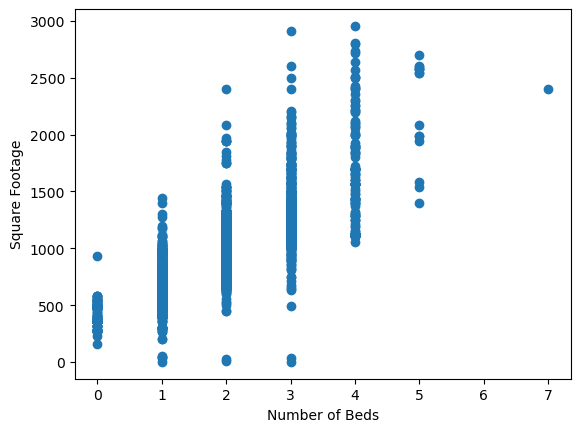

In [58]:
# Let's display out scatter plot again to compare it to that value
plt.xlabel('Number of Beds') 
plt.ylabel('Square Footage')
plt.scatter(x=rentals.beds, y=rentals.square_feet)
plt.show()
plt.close()

What do you think? 

The correlation calculation suggests that there is a strong positive correlation between beds and square footage? 
- We certainly see values moving from bottom left to top right, so this is a proportional or positive relationship.
- Strong? If you ignore those zero-based outliers, the range of values of square footage appears consistent as we increase the number of bedrooms. 

---

### Limitations of Covariance and Correlation

**Covariance** and **correlation** are great tools for evaluating associations between two variables. However, and this is important to remember, they measure the strength of **linear** relationships with **non-zero** slopes. 

This means that the results can be misleading for other types of relationships. 

![Examples of Misleading Results of Correlation](./correlation_fig_2.svg)

*Example of Misleading Results from Correlation*

Let's demonstrate a quick example of this. 

In [59]:
# import the data and take a quick look at the data. 
sleep = pd.read_csv('sleep_study.csv')

sleep.head()

,hours_sleep,performance
0,7.3,9.3
1,8.3,9.9
2,7.1,8.9
3,8.4,9.9
4,5.7,5.0


In [60]:
# what is the shape of the data, null vals, data types etc. 
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hours_sleep  50 non-null     float64
 1   performance  50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [61]:
# quick summary. 
sleep.describe()

,hours_sleep,performance
count,50.000000,50.000000
mean,8.072000,8.848000
std,1.090972,1.522919
min,5.400000,3.700000
25%,7.600000,8.500000
50%,8.300000,9.400000
75%,8.775000,9.900000
max,10.400000,10.000000


In [63]:
# Let's calculate the covariance
covariance_sleep = np.cov(sleep.hours_sleep, sleep.performance)
covariance_sleep

array([[1.19 , 0.468],
       [0.468, 2.319]])

In [65]:
# Let's calculate the correlation
sleep_corr, p = pearsonr(sleep.hours_sleep, sleep.performance)
sleep_corr

0.28149781890494135

This is less than 0.3, so we can expect this to have a very small amount of correlation. 

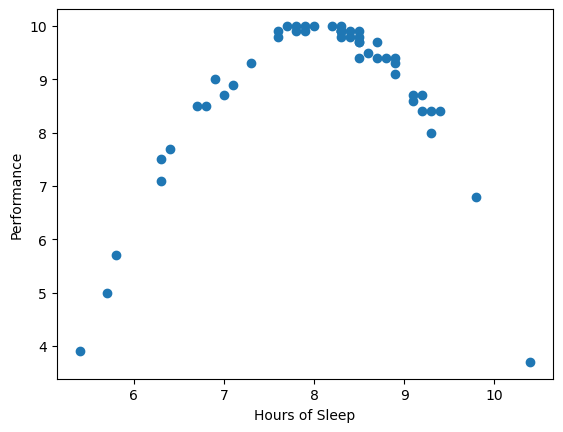

In [68]:
# Let's prove it by plotting it out...
plt.scatter(sleep.hours_sleep, sleep.performance)
plt.xlabel('Hours of Sleep')
plt.ylabel('Performance')
plt.show()
plt.close()

---

Oops. We can see that the data points have a clear relationship, it's just not linear. 

As hours of sleep approach 8, performance also increases. However, once hours of sleep continues to increase beyond 8, performance decreases, suggesting that too much sleep is bad!!!

This is a good example of the limitations of pearsons correlation and covariance. (Technically the result is accurate in that it suggests there is a weak **linear** association. This is why the result is misleading. Many engineers and scientists might assume that this means there is simply poor association altogether. 

E